# *Import Libraries*

In [17]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


# *Load, Clean and Visualize Dataset*

In [18]:
df = pd.read_csv("/content/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [20]:
# Check for missing values
print(df.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [21]:
# Check for duplicates
print(df.duplicated(subset='id').sum())

177


In [22]:
df = df.drop_duplicates(subset='id', keep='first')

In [23]:
 # Check for impossible values
print(df[df['bedrooms'] == 0])
print(df[df['price'] <= 0])

               id             date      price  bedrooms  bathrooms  \
875    6306400140  20140612T000000  1095000.0         0       0.00   
3119   3918400017  20150205T000000   380000.0         0       0.00   
3467   1453602309  20140805T000000   288000.0         0       1.50   
4868   6896300380  20141002T000000   228000.0         0       1.00   
6994   2954400190  20140624T000000  1295650.0         0       0.00   
8477   2569500210  20141117T000000   339950.0         0       2.50   
8484   2310060040  20140925T000000   240000.0         0       2.50   
9773   3374500520  20150429T000000   355000.0         0       0.00   
9854   7849202190  20141223T000000   235000.0         0       0.00   
12653  7849202299  20150218T000000   320000.0         0       2.50   
14423  9543000205  20150413T000000   139950.0         0       0.00   
18379  1222029077  20141029T000000   265000.0         0       0.75   
19452  3980300371  20140926T000000   142000.0         0       0.00   

       sqft_living 

In [24]:
# 2. Remove houses with 0 bedrooms
df = df[df['bedrooms'] > 0]

Text(0.5, 1.0, 'Price Distribution')

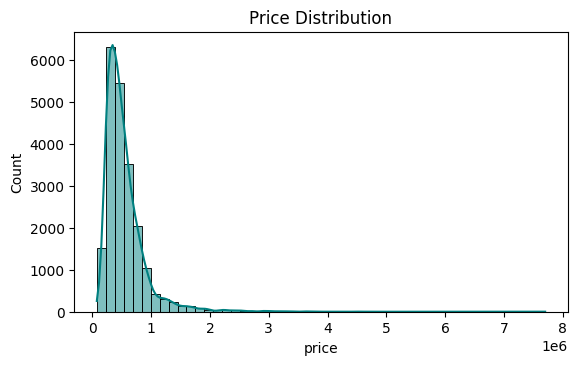

In [12]:
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['price'], bins=50, kde=True, color='teal')
plt.title('Price Distribution')

Text(0.5, 1.0, 'Price vs Square Footage')

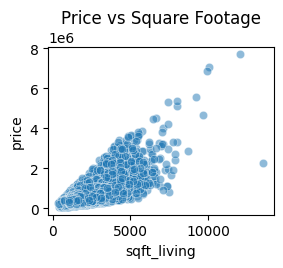

In [13]:
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='sqft_living', y='price', alpha=0.5)
plt.title('Price vs Square Footage')

Text(0.5, 1.0, 'Price vs Bedrooms')

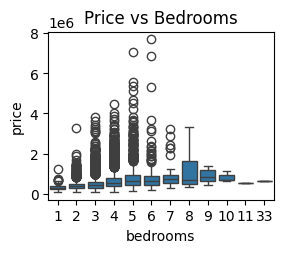

In [14]:
plt.subplot(2, 2, 3)
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Price vs Bedrooms')

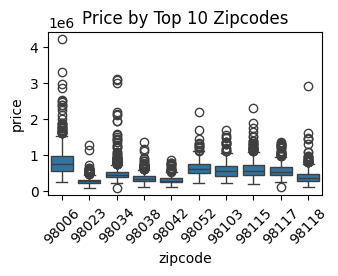

In [16]:
plt.subplot(2, 2, 4)
top_zipcodes = df['zipcode'].value_counts().nlargest(10).index
sns.boxplot(x='zipcode', y='price', data=df[df['zipcode'].isin(top_zipcodes)])
plt.title('Price by Top 10 Zipcodes')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [25]:
# Remove top 1% outliers in price and sqft_living
df = df[df['price'] < df['price'].quantile(0.99)]
df = df[df['sqft_living'] < df['sqft_living'].quantile(0.99)]

In [26]:
# Apply log transformation to stabilize skewness
df['log_price'] = np.log1p(df['price'])

# *KMeans Clustering for Fine-Grained Location*

In [30]:
# Use latitude and longitude for clustering into location groups
coords = df[['lat', 'long']]
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['location_cluster'] = kmeans.fit_predict(coords)

# *Feature Selection and Encoding*

In [31]:
# Select important features
features = ['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'zipcode', 'location_cluster']
X = df[features]
y = df['log_price']

# One-hot encode categorical features
X = pd.get_dummies(X, columns=['zipcode', 'location_cluster'], drop_first=True)

# *Train-Test Split and Scaling*

In [32]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# *Train Model*

In [34]:
# Gradient Boosting Regressor for prediction
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(max_depth=5, random_state=42)

# *Prediction and Evaluation*

In [35]:
# Predict and inverse log-transform the predictions
y_pred_log = model.predict(X_test_scaled)
y_pred = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

# Evaluate the model
mae = mean_absolute_error(y_test_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 82696.07
RMSE: 129762.05


# *Visualize Actual vs Predicted Prices*

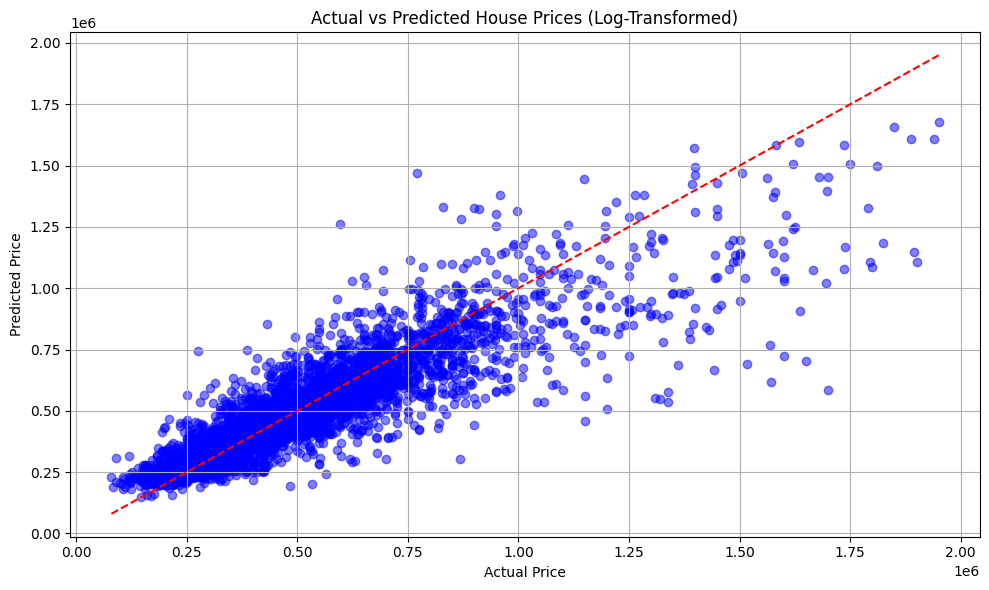

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual, y_pred, alpha=0.5, color='blue')
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()],
         '--', color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices (Log-Transformed)')
plt.grid(True)
plt.tight_layout()
plt.show()

# *Feature Importance Visualization*

In [37]:
# Get feature importances from trained Gradient Boosting model
importances = model.feature_importances_
feature_names = X.columns

In [38]:
# Create DataFrame of feature importance
feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

In [39]:
# Sort and select top 20 most important features
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False).head(20)


/tmp/ipython-input-40-1887797173.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')


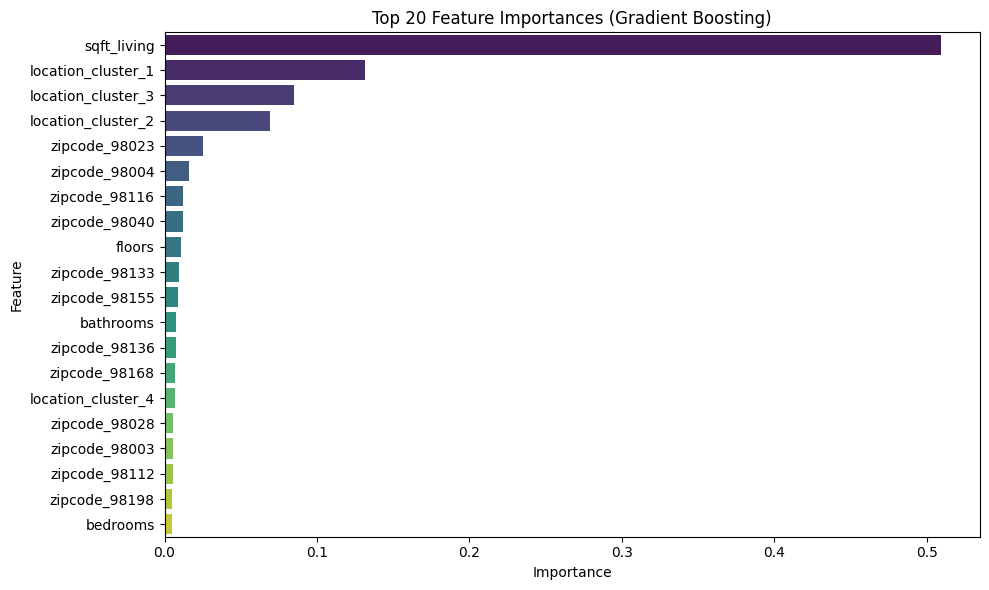

In [40]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title('Top 20 Feature Importances (Gradient Boosting)')
plt.tight_layout()
plt.show()

# *Model Tuning using GridSearchCV*

In [41]:
from sklearn.model_selection import GridSearchCV


In [42]:
# Define parameter grid to search
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [43]:
# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1
)


In [44]:
# Fit on training data
grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [45]:
# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


# *Evaluate Tuned Model*

In [46]:
# Predict and inverse transform log price
y_pred_log_best = best_model.predict(X_test_scaled)
y_pred_best = np.expm1(y_pred_log_best)
y_test_actual = np.expm1(y_test)


In [47]:
# Evaluate tuned model
mae_best = mean_absolute_error(y_test_actual, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test_actual, y_pred_best))
print(f"Tuned Model MAE: {mae_best:.2f}")
print(f"Tuned Model RMSE: {rmse_best:.2f}")

Tuned Model MAE: 79774.56
Tuned Model RMSE: 127210.37


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual, y_pred, alpha=0.5, color='blue')
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()],
         '--', color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices (Log-Transformed)')
plt.grid(True)
plt.tight_layout()
plt.show()

# *Visualize Evaluation Metrics Comparison (MAE & RMSE)*

In [53]:
# Define metrics and values
metrics = ['MAE', 'RMSE']
original_scores = [82696.07, 129762.05]
tuned_scores = [79774.56, 127210.37]


In [54]:
x = np.arange(len(metrics))  # [0, 1]
width = 0.35  # Width of each bar


<BarContainer object of 2 artists>

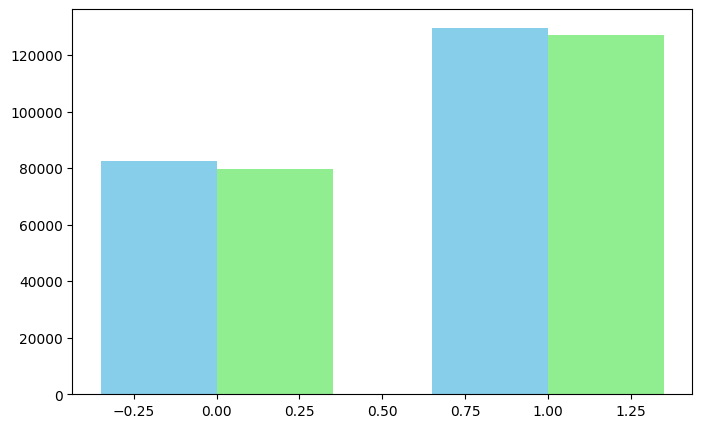

In [55]:
# Create figure
plt.figure(figsize=(8, 5))

# Plot bars
plt.bar(x - width/2, original_scores, width, label='Original Model', color='skyblue')
plt.bar(x + width/2, tuned_scores, width, label='Tuned Model', color='lightgreen')


# *Actual vs Predicted (Tuned Model) Visualization*

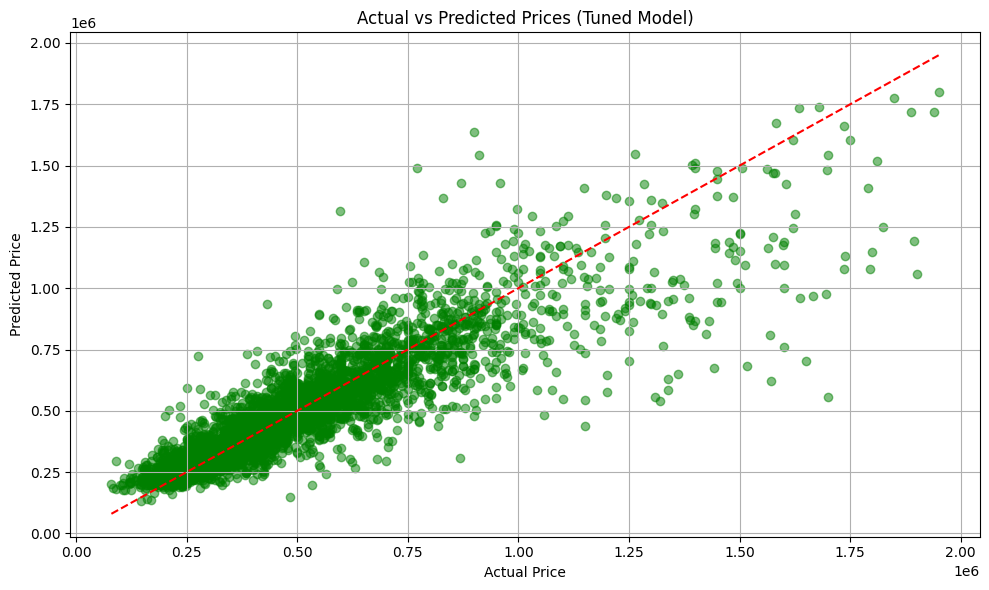

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual, y_pred_best, alpha=0.5, color='green')
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()],
         '--', color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Tuned Model)')
plt.grid(True)
plt.tight_layout()
plt.show()